<a href="https://colab.research.google.com/github/jmbmartins/UnsupervisedLearningProject/blob/main/pratical_project_iv.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Use different clustering strategies (e.g., K-Means, DBSCAN, SOM or Hierarchical clustering methods) to obtain “k” consistent groups of customers. The appropriate value of “k” should also be obtained by yourself.

# **K-Means**

Determining the optimal number of clusters...


/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:8

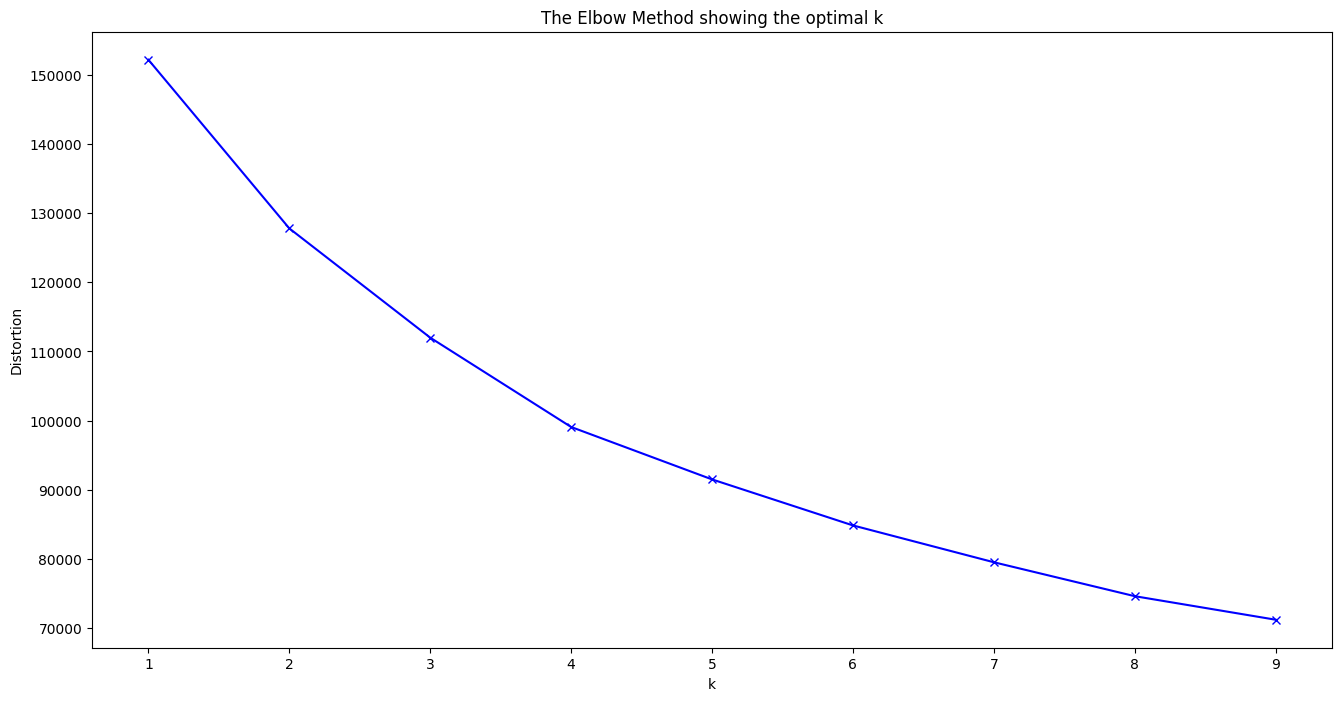

Optimal K:  4
For Elbow Number of Clusters:
Elbow Number: 4
Silhouette Score: 0.1982270291672841

For Silhouette Number of Clusters:
Silhouette Number: 3
Silhouette Score: 0.24978243426308558


In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.preprocessing import StandardScaler
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score

# Load the dataset
df = pd.read_csv('/content/drive/MyDrive/CC GENERAL.csv')

# Preprocessing
df = df.drop('CUST_ID', axis=1)
df.fillna(method ='ffill', inplace = True)

# Standardize the data
scaler = StandardScaler()
df_scaled = scaler.fit_transform(df)

# Determine the number of clusters
silhouette_scores = []
n_cluster = 1
max_clusters = 10

for n_cluster in range(2, max_clusters+1):
    kmeans = KMeans(n_clusters = n_cluster, n_init=10)
    cluster_labels = kmeans.fit_predict(df_scaled)
    score = silhouette_score(df_scaled, cluster_labels)
    silhouette_scores.append(score)

# ---------------- Elbow Method ---------------------------
print("Determining the optimal number of clusters...")
distortions = []
K = range(1,10)
for k in K:
    kmeanModel = KMeans(n_clusters=k, n_init=10)
    kmeanModel.fit_predict(df_scaled)
    distortions.append(kmeanModel.inertia_)

plt.figure(figsize=(16,8))
plt.plot(K, distortions, 'bx-')
plt.xlabel('k')
plt.ylabel('Distortion')
plt.title('The Elbow Method showing the optimal k')
plt.show()

# Calculate the distances of each point to the line connecting the first and last points
first_point = [1, distortions[0]]
last_point = [10, distortions[-1]]
distances = []
for i in range(len(distortions)):
    x = i + 1
    y = distortions[i]
    numerator = abs((last_point[1]-first_point[1])*x - (last_point[0]-first_point[0])*y + last_point[0]*first_point[1] - last_point[1]*first_point[0])
    denominator = ((last_point[1] - first_point[1])**2 + (last_point[0] - first_point[0])**2)**0.5
    distances.append(numerator/denominator)

# The optimal number of clusters is the point that is farthest away from the line
optimal_clusters_elbow = distances.index(max(distances)) + 1

# Perform K-Means clustering with "elbow k" clusters
kmeans_elbow = KMeans(n_clusters=optimal_clusters_elbow, n_init=10)
cluster_labels_elbow = kmeans_elbow.fit_predict(df_scaled)

# Calculate evaluation metrics for "elbow k" clusters
silhouette_score_elbow = silhouette_score(df_scaled, cluster_labels_elbow)

print("For Elbow Number of Clusters:")
print("Elbow Number:" , optimal_clusters_elbow)
print(f"Silhouette Score: {silhouette_score_elbow}")



# ---------------- Silhouette Score Metric -------------------------------

n_clusters_silhouette = silhouette_scores.index(max(silhouette_scores)) + 2

# Perform K-Means clustering with n clusters
kmeans_silhouette = KMeans(n_clusters=n_clusters_silhouette, n_init=10)
cluster_labels_silhouette = kmeans_silhouette.fit_predict(df_scaled)

# Calculate evaluation metrics for n clusters
silhouette_score_silhouette = silhouette_score(df_scaled, cluster_labels_silhouette)

print("\nFor Silhouette Number of Clusters:")
print("Silhouette Number:" , n_clusters_silhouette)
print(f"Silhouette Score: {silhouette_score_silhouette}")

# **DBSCAN**

Optimal eps: 2.0
Optimal min_samples: 6
Optimal silhouette score: 0.48029771525498055
Cluster sizes:
 0    8318
-1     632
Name: cluster, dtype: int64
Cluster centroids:
             BALANCE  BALANCE_FREQUENCY    PURCHASES  ONEOFF_PURCHASES  \
cluster                                                                  
-1       4312.136295           0.923142  4550.000791       2951.881028   
 0       1355.708051           0.873785   733.719976        413.167307   

         INSTALLMENTS_PURCHASES  CASH_ADVANCE  PURCHASES_FREQUENCY  \
cluster                                                              
-1                  1599.103940   3543.445036             0.700524   
 0                   320.800881    784.015291             0.474382   

         ONEOFF_PURCHASES_FREQUENCY  PURCHASES_INSTALLMENTS_FREQUENCY  \
cluster                                                                 
-1                         0.446022                          0.536463   
 0                         0.1839

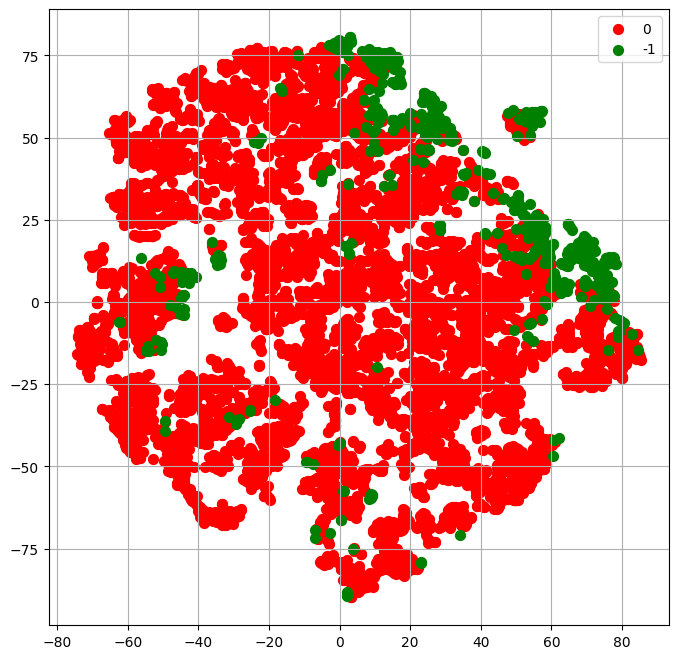

In [ ]:
import pandas as pd
from sklearn.preprocessing import StandardScaler
from sklearn.cluster import DBSCAN
from sklearn.metrics import silhouette_score
from sklearn.manifold import TSNE
import numpy as np
import matplotlib.pyplot as plt


# Load the dataset
df = pd.read_csv('/content/drive/MyDrive/CC GENERAL.csv')

# Preprocessing
df = df.drop('CUST_ID', axis=1)
df.fillna(method ='ffill', inplace = True)

# Standardize the data
scaler = StandardScaler()
df_scaled = scaler.fit_transform(df)


eps_space = np.linspace(0.1, 2.0, 20)  # start from 0.1 instead of 0
min_samples_space = range(1, 21)  # start from 1 instead of 0

# Grid search
optimal_eps = 0
optimal_min_samples = 0
optimal_score = -1  # Initialize optimal_score
for eps in eps_space:
    for min_samples in min_samples_space:
        dbscan = DBSCAN(eps=eps, min_samples=min_samples)
        labels = dbscan.fit_predict(df_scaled)
        if len(set(labels)) > 1:  # more than 1 cluster created
            score = silhouette_score(df_scaled, labels)
            if score > optimal_score:
                optimal_eps = eps
                optimal_min_samples = min_samples
                optimal_score = score

print(f'Optimal eps: {optimal_eps}')
print(f'Optimal min_samples: {optimal_min_samples}')
print(f'Optimal silhouette score: {optimal_score}')


# Perform DBSCAN clustering
dbscan = DBSCAN(eps=optimal_eps, min_samples=optimal_min_samples).fit(df_scaled)

# Add cluster labels to the original data
df['cluster'] = dbscan.labels_

# Print the size of each cluster
print("Cluster sizes:")
print(df['cluster'].value_counts())

# Print the mean values of each variable for each cluster
print("Cluster centroids:")
print(df.groupby('cluster').mean())


# Perform t-SNE
tsne = TSNE(n_components=2, random_state=0)
df_tsne = tsne.fit_transform(df_scaled)

# Create a DataFrame with the t-SNE data and the cluster labels
df_tsne = pd.DataFrame(data=df_tsne, columns=['Component 1', 'Component 2'])
df_tsne['Cluster'] = dbscan.labels_

# Visualize the clusters
plt.figure(figsize=(8,8))
colors = ['r', 'g', 'b']
for cluster, color in zip(df['cluster'].unique(), colors):
    indicesToKeep = df_tsne['Cluster'] == cluster
    plt.scatter(df_tsne.loc[indicesToKeep, 'Component 1']
               , df_tsne.loc[indicesToKeep, 'Component 2']
               , c = color
               , s = 50)
plt.legend(df['cluster'].unique())
plt.grid()


# **Self-Organnizing Map**

Starting the script...
Initializing and training the SOM...
Number of Features: 17
Getting the winning coordinates...
Determining the optimal number of clusters...


/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:8

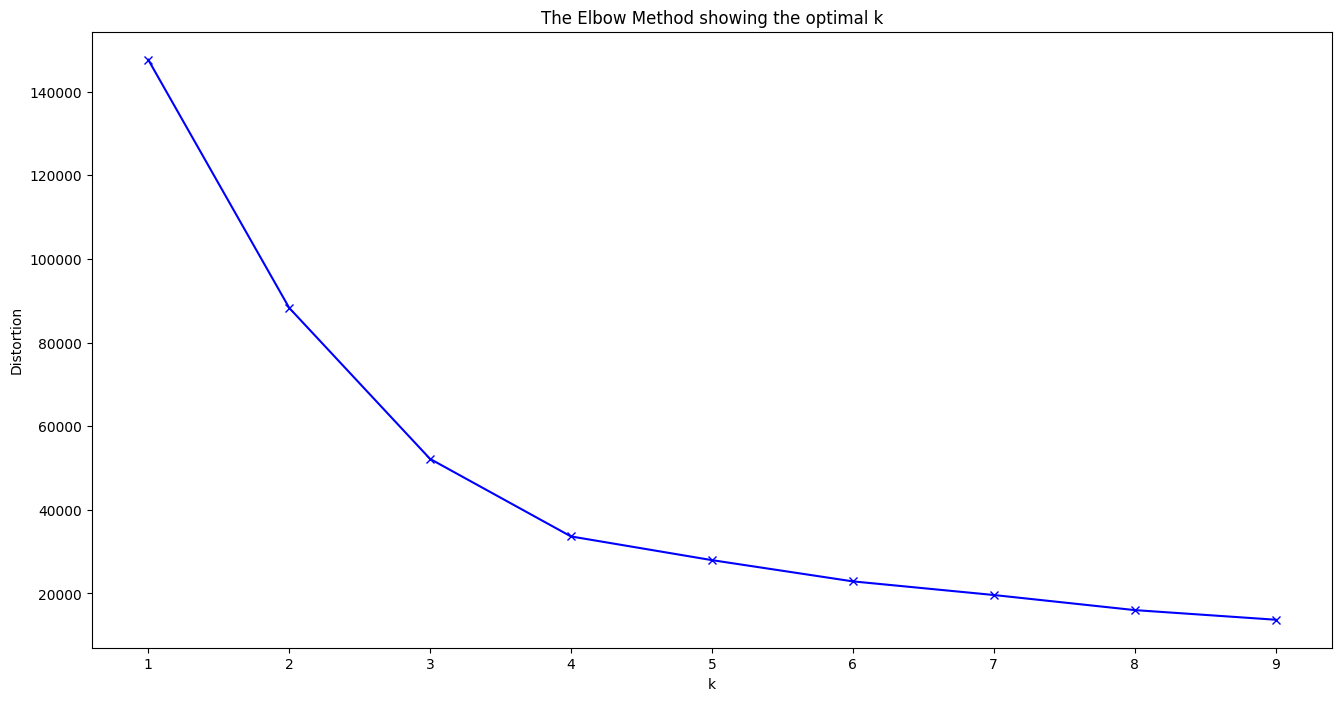

Optimal K:  4
Clustering completed successfully!
Silhouette Score:  0.45924570341987164


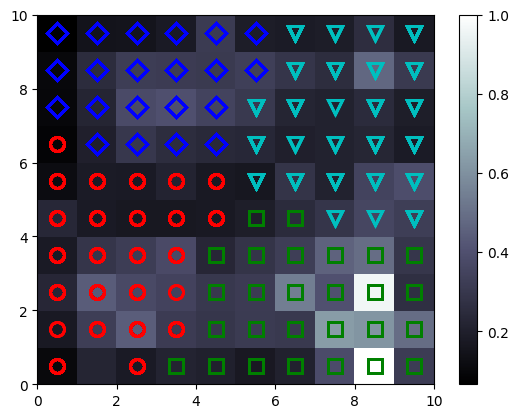

Quantization Error:  1.9142504018120625
Topographic Error:  0.661340782122905


In [ ]:
from minisom import MiniSom
import numpy as np
from sklearn.preprocessing import StandardScaler
from sklearn.cluster import KMeans
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.metrics import silhouette_score
from sklearn.metrics.pairwise import euclidean_distances
from matplotlib.pylab import bone, pcolor, colorbar, plot, show


print("Starting the script...")

# Load the dataset
df = pd.read_csv('/content/drive/MyDrive/CC GENERAL.csv')  # replace with your actual csv file


# Preprocessing
df = df.drop('CUST_ID', axis=1)
df.fillna(method ='ffill', inplace = True)

# Standardize the data
scaler = StandardScaler()
data_scaled = scaler.fit_transform(df)


# Initialize and train the SOM
print("Initializing and training the SOM...")
x_size = 10  # size of the SOM
y_size = 10
input_len = data_scaled.shape[1]  # number of features in the dataset
print('Number of Features:', input_len)
som = MiniSom(x_size, y_size, input_len, sigma=1.0, learning_rate=1)
som.random_weights_init(data_scaled)
som.train_random(data_scaled, 100)  # number of iterations

# Get the coordinates of the winning neuron for each data point (the neuron with the closest weights to the data point)
print("Getting the winning coordinates...")
winning_coordinates = np.array([som.winner(x) for x in data_scaled]).astype(float)

# Determine the optimal number of clusters using the Elbow Method
print("Determining the optimal number of clusters...")
distortions = []
K = range(1,10)
for k in K:
    kmeanModel = KMeans(n_clusters=k)
    kmeanModel.fit(winning_coordinates)
    distortions.append(kmeanModel.inertia_)

plt.figure(figsize=(16,8))
plt.plot(K, distortions, 'bx-')
plt.xlabel('k')
plt.ylabel('Distortion')
plt.title('The Elbow Method showing the optimal k')
plt.show()

# Calculate the distances of each point to the line connecting the first and last points
first_point = [1, distortions[0]]
last_point = [10, distortions[-1]]
distances = []
for i in range(len(distortions)):
    x = i + 1
    y = distortions[i]
    numerator = abs((last_point[1]-first_point[1])*x - (last_point[0]-first_point[0])*y + last_point[0]*first_point[1] - last_point[1]*first_point[0])
    denominator = ((last_point[1] - first_point[1])**2 + (last_point[0] - first_point[0])**2)**0.5
    distances.append(numerator/denominator)

# The optimal number of clusters is the point that is farthest away from the line
optimal_k = distances.index(max(distances)) + 1

print("Optimal K: ", optimal_k)

# Perform KMeans clustering on the winning coordinates with the optimal number of clusters
kmeans = KMeans(n_clusters=optimal_k, n_init=10)
clusters = kmeans.fit_predict(winning_coordinates)

# Now, 'clusters' contains the cluster assignments for each data point
df['cluster'] = clusters

print("Clustering completed successfully!")


# Calculate Silhouette Score
score = silhouette_score(winning_coordinates, clusters)

print("Silhouette Score: ", score)

bone()
pcolor(som.distance_map().T)
colorbar()
markers = ['o', 's', 'D', 'v', '^', '<', '>', '8', 'p']
colors = ['r', 'g', 'b', 'c', 'm', 'y', 'k', '#eeefff', '#15b01a']
for i, x in enumerate(data_scaled):
    w = som.winner(x)
    plot(w[0] + 0.5,
         w[1] + 0.5,
         markers[clusters[i]],
         markeredgecolor = colors[clusters[i]],
         markerfacecolor = 'None',
         markersize = 10,
         markeredgewidth = 2)
show()

# Calculate Quantization and Topographic errors
q_error = som.quantization_error(data_scaled)
t_error = som.topographic_error(data_scaled)

print("Quantization Error: ", q_error)
print("Topographic Error: ", t_error)


In [ ]:
!pip install minisom

  Preparing metadata (setup.py) ... done
  Created wheel for minisom: filename=MiniSom-2.3.1-py3-none-any.whl size=10589 sha256=68566d2df6434157c939b93f4b91f18286d3ed11359aa0af123a281d9010c9c8
  Stored in directory: /root/.cache/pip/wheels/c7/92/d2/33bbda5f86fd8830510b16aa98c8dd420129b5cb24248fd6db
Successfully built minisom
